# 3.1 Logistic Regression  (Important)


- Outcome might be 0 or 1, Yes or No, True or False, High or Low


### Use - Cases 

- Weather 
- Determines Illnes 

### Implement Logistic Regression 

1. Collecting Data 
2. Analyzing Data 
3. Data Wrangling (Cleaning your Data)
4. Train and Test 
5. Accuracy Check


### Example

- Titanic Data Analysis 

Explore titanic dataset and explore about the people, both those who survived and those who did not. With today's technology, answering questions through data analysis is now easier than ever

# 1. Collecting the Data 

In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import  math 

titanic_data = pd.read_csv("datasets_122398_315766_full.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",NaN,175MB,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",Southampton,"Chicago, Illinois, US",NaN,NaN,3.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",Cherbourg,"Cleveland, Ohio, US",?,NaN,2.0


In [18]:
print("# passengers in original data:"+str(len(titanic_data.index)))

# passengers in original data:1309


# 2. Analyzing the Data


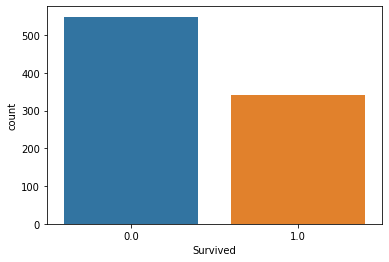

In [3]:
sns.countplot(x="Survived", data=titanic_data)

# 0.0 did not survived 
# 1.0 did survive 

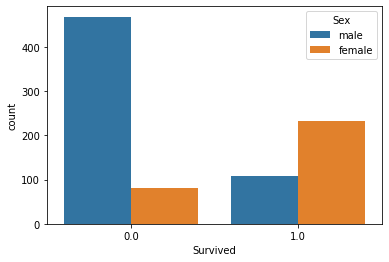

In [4]:
# compare sex 

sns.countplot(x="Survived", hue="Sex", data=titanic_data)

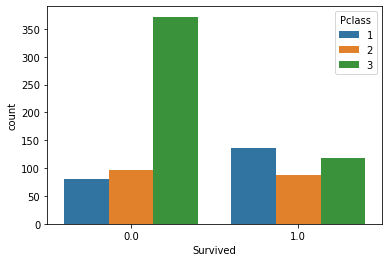

In [5]:
# Passenger Class 

#Blue for first class
#Orange second class
#Green third class

sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

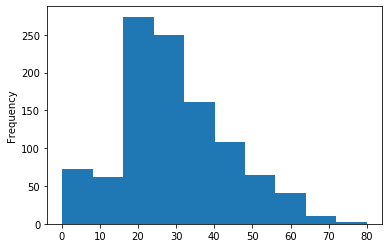

In [6]:
#Distribution AGE

titanic_data["Age"].plot.hist()

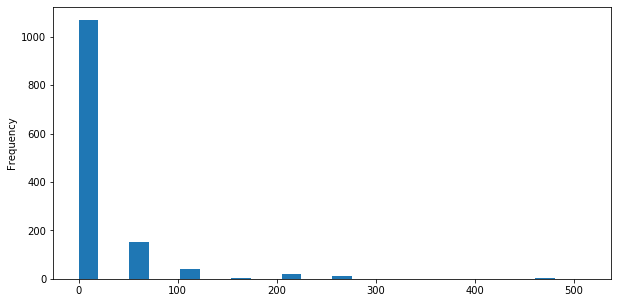

In [7]:
titanic_data["Fare"].plot.hist(width=20, figsize=(10,5))

In [19]:
# What columns are left

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

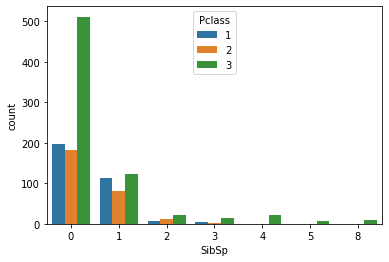

In [9]:
sns.countplot(x="SibSp", hue="Pclass", data=titanic_data)

# 3. Data Wrangling

In [20]:
# What values are null 
# False: it is not null
#True: It is null

titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1305,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1306,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1307,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [21]:
#Missing values 

titanic_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

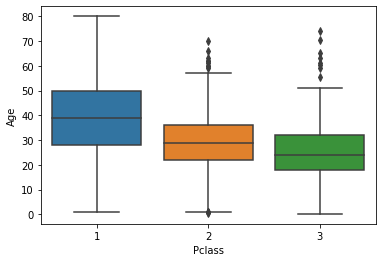

In [23]:
sns.boxplot(x="Pclass",y="Age", data=titanic_data)

In [24]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [25]:
#Wrangling
# Deleting Data or Columns with non values 

titanic_data.drop("Body", axis=1, inplace=True)

In [26]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,3.0


In [27]:
# Randomly delete all non values instead of doing one by one

titanic_data.dropna(inplace=True)

In [28]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
WikiId         0
Name_wiki      0
Age_wiki       0
Hometown       0
Boarded        0
Destination    0
Lifeboat       0
Class          0
dtype: int64

In [29]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Class
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,1.0


In [30]:
# Convert these variables into dummy variables 
# We drop the column female 

sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
1,0
3,0
10,0
11,0
21,1


In [31]:
Embarked	 = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
Embarked	.head(5)

,Q,S
1,0,0
3,0,1
10,0,1
11,0,1
21,0,1


In [32]:
Pcl	 = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl	.head(5)

# We finished making the values categorical

,2,3
1,0,0
3,0,0
10,0,1
11,0,0
21,1,0


In [33]:
# Concatenate all these new values into the dataset

titanic_data=pd.concat([titanic_data,sex,Embarked,Pcl],axis=1)

In [34]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Hometown,Boarded,Destination,Lifeboat,Class,male,Q,S,2,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"New York, New York, US",Cherbourg,"New York, New York, US",4,1.0,0,0,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,1.0,0,0,1,0,0
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,...,"Motala, Östergötland, Sweden",Southampton,"San Francisco, US",13,3.0,0,0,1,0,1
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,...,"Youngstown, Ohio, US",Southampton,"Youngstown, Ohio, US",8,1.0,0,0,1,0,0
21,22,1.0,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,...,"London, England, UK",Southampton,"Toronto, Ontario, Canada",13,2.0,1,0,1,1,0


In [35]:
#Deleting columns

titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [36]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Class,male,Q,S,2,3
1,1.0,1,38.0,1,0,71.2833,C85,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,1.0,0,0,0,0,0
3,1.0,1,35.0,1,0,53.1000,C123,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,1.0,0,0,1,0,0
10,1.0,3,4.0,1,1,16.7000,G6,1193.0,"Sandström, Miss Marguerite Rut",4.0,"Motala, Östergötland, Sweden",Southampton,"San Francisco, US",13,3.0,0,0,1,0,1
11,1.0,1,58.0,0,0,26.5500,C103,35.0,"Bonnell, Miss Elizabeth",61.0,"Youngstown, Ohio, US",Southampton,"Youngstown, Ohio, US",8,1.0,0,0,1,0,0
21,1.0,2,34.0,0,0,13.0000,D56,346.0,"Beesley, Mr. Lawrence",34.0,"London, England, UK",Southampton,"Toronto, Ontario, Canada",13,2.0,1,0,1,1,0


In [37]:
#Deleting Columns 

titanic_data.drop(['Pclass','Cabin','WikiId','Name_wiki','Hometown','Destination','Lifeboat'],axis=1,inplace=True)

In [38]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Age_wiki,Boarded,Class,male,Q,S,2,3
1,1.0,38.0,1,0,71.2833,35.0,Cherbourg,1.0,0,0,0,0,0
3,1.0,35.0,1,0,53.1000,35.0,Southampton,1.0,0,0,1,0,0
10,1.0,4.0,1,1,16.7000,4.0,Southampton,3.0,0,0,1,0,1
11,1.0,58.0,0,0,26.5500,61.0,Southampton,1.0,0,0,1,0,0
21,1.0,34.0,0,0,13.0000,34.0,Southampton,2.0,1,0,1,1,0


In [39]:
titanic_data.drop(['Age_wiki',],axis=1,inplace=True)

In [40]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Boarded,Class,male,Q,S,2,3
1,1.0,38.0,1,0,71.2833,Cherbourg,1.0,0,0,0,0,0
3,1.0,35.0,1,0,53.1000,Southampton,1.0,0,0,1,0,0
10,1.0,4.0,1,1,16.7000,Southampton,3.0,0,0,1,0,1
11,1.0,58.0,0,0,26.5500,Southampton,1.0,0,0,1,0,0
21,1.0,34.0,0,0,13.0000,Southampton,2.0,1,0,1,1,0


In [41]:
titanic_data.drop(['Boarded','Class'],axis=1,inplace=True)

In [114]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,1.0,38.0,1,0,71.2833,0,0,0,0,0
3,1.0,35.0,1,0,53.1000,0,0,1,0,0
10,1.0,4.0,1,1,16.7000,0,0,1,0,1
11,1.0,58.0,0,0,26.5500,0,0,1,0,0
21,1.0,34.0,0,0,13.0000,1,0,1,1,0


# 4.Train and Test

 Build the model on the train data and predict the output on the test data 
- Logistic = LogisticRegression()
- logistic.fit(train_X, train_Y)

In [163]:
# Define depedent and independent variable 
# Survided is the column that we want to predict 

X= titanic_data.drop("Survived", axis=1)
y= titanic_data["Survived"]

In [124]:
# Split the data into training and tetsing subset we use sklearn 

from sklearn.model_selection import train_test_split

In [166]:
# Click on shift and tab and you will see the examples of how split your data 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)




In [167]:
# Now we hace to train and predict creating a model 

from sklearn.linear_model import LogisticRegression


In [168]:
# Create the instance of this logistic regression model 

logmodel=LogisticRegression()
 


In [ ]:
# Fit the model 


# I tried using this code but the result was "ValueError: This solver needs samples of at least 2 classes in the data, 
# but the data contains only one class: 1.0
#" so after trying to fix it, I found in a community from stack overflow and Github it was bug indeed. so the solution" 
# was to shuffel the arrays. 
# Using      from sklearn.utils import shuffle
            
logmodel.fit(X_train,y_train)


In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
#Evaluate the model 

from sklearn.metrics import classification_report 

In [ ]:
classification_report(y_test, predictions)

In [179]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

# 5.Accuracy check

In [ ]:


from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)